In [5400]:
#Import Package

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from sklearn import model_selection

from sklearn.model_selection import KFold

from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest, f_classif

In [5401]:
#Import datasets

#Reading datasets train.csv using pandas 
train = pd.read_csv("E:/Titanic-data/train.csv")

#Reading datasets test.csv using pandas
test = pd.read_csv("E:/Titanic-data/test.csv")

In [5402]:
#View training set numerical data statistics results
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5403]:
#View the missing training set data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5404]:
#Statistics of survived and not survived ratio
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

First class survival: 0.6296296296296297
Second class survival: 0.47282608695652173
Third class survival: 0.24236252545824846


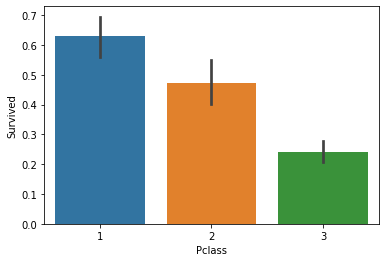

In [5405]:
#See the impact of Pclass on survival 
sns.barplot(x="Pclass",y="Survived",data=train)
print("First class survival:", train["Survived"][train["Pclass"] == 1].value_counts(normalize=True)[1])
print("Second class survival:", train["Survived"][train["Pclass"] == 2].value_counts(normalize=True)[1])
print("Third class survival:", train["Survived"][train["Pclass"] == 3].value_counts(normalize=True)[1])

Male survival: 0.18890814558058924
Female survival: 0.7420382165605095


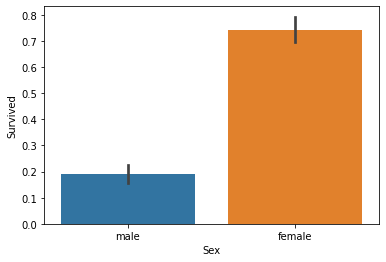

In [5406]:
#See the impact of Sex on survival 
sns.barplot(x="Sex",y="Survived",data=train)
print("Male survival:", train["Survived"][train["Sex"] == "male"].value_counts(normalize=True)[1])
print("Female survival:", train["Survived"][train["Sex"] == "female"].value_counts(normalize=True)[1])

Text(28.04088541666667, 0.5, 'Survived')

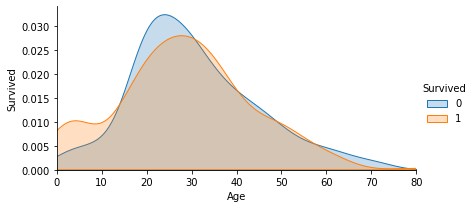

In [5407]:
#See the impact of Age on survival 
facet = sns.FacetGrid(train,hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

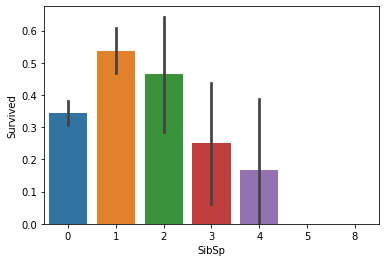

In [5408]:
#See the impact of SibSp on survival 
sns.barplot(x="SibSp",y="Survived",data=train)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

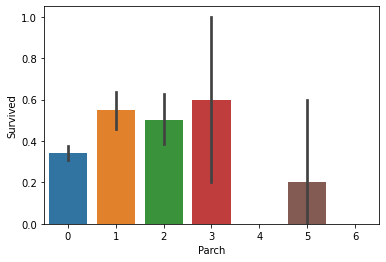

In [5409]:
#See the impact of Parch on survival  
sns.barplot(x="Parch",y="Survived",data=train)

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

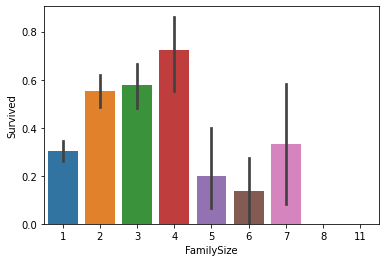

In [5410]:
#See the impact of FamilySize on survival  
train['FamilySize']=train['SibSp']+train['Parch']+1

sns.barplot(x="FamilySize",y="Survived",data=train)

Text(28.04088541666667, 0.5, 'Survived')

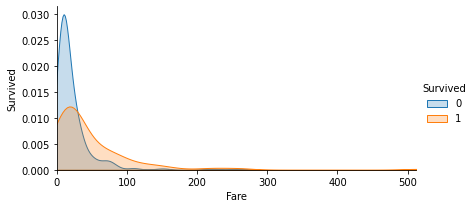

In [5411]:
#See the impact of Fare on survival  
facet = sns.FacetGrid(train,hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlabel('Fare')
plt.ylabel('Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

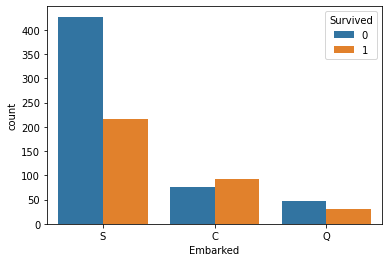

In [5412]:
#See the impact of Embarked on survival   
sns.countplot(x='Embarked',hue='Survived',data=train)

Royalty survival: 0.75
Master survival: 0.575
Mrs survival: 0.7936507936507936
Miss survival: 0.7027027027027027
Mr survival: 0.15667311411992263
Other survival: 0.2631578947368421


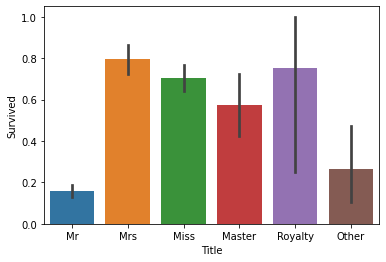

In [5413]:
#Feature selection
#1--Process Name data
train['Title'] = train['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
#Royalty
train['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady'], 'Royalty', inplace=True)
#Master
train['Title'].replace(['Master'], 'Master', inplace=True)
#MMrs
train['Title'].replace(['Mme', 'Mrs'],'Mrs', inplace=True)
#Miss
train['Title'].replace(['Mlle', 'Miss', 'Ms'], 'Miss', inplace=True)
#Mr
train['Title'].replace(['Mr'], 'Mr', inplace=True)
#Other
train['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer'], 'Other', inplace=True)

sns.barplot(x="Title", y="Survived", data=train)
print("Royalty survival:", train["Survived"][train["Title"] == "Royalty"].value_counts(normalize=True)[1])
print("Master survival:", train["Survived"][train["Title"] == "Master"].value_counts(normalize=True)[1])
print("Mrs survival:", train["Survived"][train["Title"] == "Mrs"].value_counts(normalize=True)[1])
print("Miss survival:", train["Survived"][train["Title"] == "Miss"].value_counts(normalize=True)[1])
print("Mr survival:", train["Survived"][train["Title"] == "Mr"].value_counts(normalize=True)[1])
print("Other survival:", train["Survived"][train["Title"] == "Other"].value_counts(normalize=True)[1])

<AxesSubplot:xlabel='FamilyType', ylabel='Survived'>

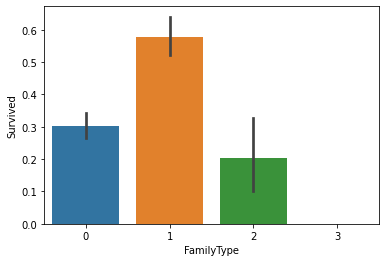

In [5414]:
#2--Process FamilySize data
#Situation 1
train.loc[train['FamilySize']<2,'FamilyType']=0
#Situation 2
train.loc[(train['FamilySize']>=2)&(train['FamilySize']<=4),'FamilyType']=1
#Situation 3
train.loc[(train['FamilySize']>4)&(train['FamilySize']<=7),'FamilyType']=2
#Situation 4
train.loc[train['FamilySize']>7,'FamilyType']=3
train['FamilyType']=train['FamilyType'].astype(np.int32)

sns.barplot(x="FamilyType", y="Survived", data=train)

In [5415]:
#3--Process Ticket data 
#Classification according to the number of passengers corresponding to ticket
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

<AxesSubplot:xlabel='TicketFamily', ylabel='Survived'>

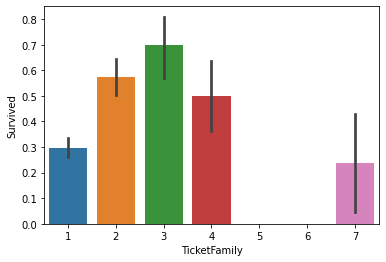

In [5416]:
TicketCount = dict(train['Ticket'].value_counts())
train['TicketFamily'] = train['Ticket'].apply(lambda x:TicketCount[x])

sns.barplot(x="TicketFamily", y="Survived", data=train)

<AxesSubplot:xlabel='TicketType', ylabel='Survived'>

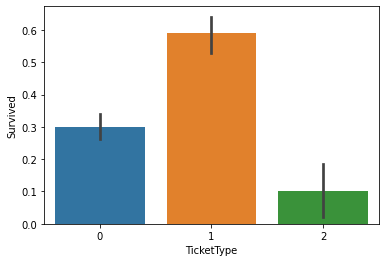

In [5417]:
#Situation 1
train.loc[train['TicketFamily']<2,'TicketType']=0
#Situation 2
train.loc[(train['TicketFamily']>=2)&(train['TicketFamily']<=4),'TicketType']=1
#Situation 3
train.loc[train['TicketFamily']>4,'TicketType']=2
train['TicketType']=train['TicketType'].astype(np.int32)

sns.barplot(x="TicketType", y="Survived", data=train)

In [5418]:
#Data completion
#1--Age completion
#Import Random forest regression tree to complete Age

from sklearn.ensemble import RandomForestRegressor

ages = train[['Age', 'Pclass','Sex','Title','Fare']]
ages=pd.get_dummies(ages)

known_ages = ages[ages.Age.notnull()].values
unknown_ages = ages[ages.Age.isnull()].values
y = known_ages[:, 0]
X = known_ages[:, 1:]

rfr = RandomForestRegressor(random_state=60, n_estimators=100, n_jobs=-1)

rfr.fit(X, y)

pre_ages = rfr.predict(unknown_ages[:, 1::])

train.loc[ (train.Age.isnull()), 'Age' ] = pre_ages

#View data default after Age completion
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  FamilySize    891 non-null    int64  
 13  Title         891 non-null    object 
 14  FamilyType    891 non-null    int32  
 15  TicketFamily  891 non-null    int64  
 16  TicketType    891 non-null    int32  
dtypes: float64(2), int32(2), int64(7), object(6)
memory usage: 111.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      889 non-null    object 
 12  FamilySize    891 non-null    int64  
 13  Title         891 non-null    object 
 14  FamilyType    891 non-null    int32  
 15  TicketFamily  891 non-null    int64  
 16  TicketType    891 non-null    int32  
 17  BoardNumber   891 non-null    object 
dtypes: float64(2), int32(2), int64

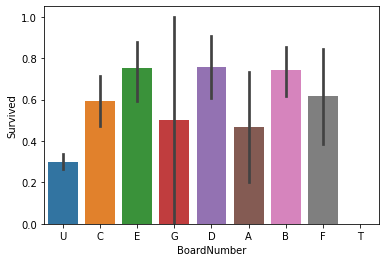

In [5419]:
#Data completion
#2--Cabin completion
train['Cabin'] = train['Cabin'].fillna('Unkown')
train['BoardNumber']=train['Cabin'].str.get(0)
sns.barplot(x="BoardNumber", y="Survived", data=train)

#View data default after Cabin completion
train.info()

In [5420]:
#Data completion
#3--Embarked completion
#View Embarked data
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,FamilyType,TicketFamily,TicketType,BoardNumber
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,Miss,0,2,1,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,Mrs,0,2,1,B


In [5421]:
#train.groupby(by=["Pclass","Embarked"]).median()
train.groupby(by=["Pclass","Embarked"]).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [5422]:
#Data completion
#3--Embarked completion
train['Embarked'] = train['Embarked'].fillna('C')

#View data default after Embarked completion
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      891 non-null    object 
 12  FamilySize    891 non-null    int64  
 13  Title         891 non-null    object 
 14  FamilyType    891 non-null    int32  
 15  TicketFamily  891 non-null    int64  
 16  TicketType    891 non-null    int32  
 17  BoardNumber   891 non-null    object 
dtypes: float64(2), int32(2), int64

In [5423]:
#Data conversion
#Mapping Name data to numeric data
#re make the python language have all the regular expression functions
import re
def get_title(name):
    #re.search Scans the entire string and returns the first successful match
    title_search=re.search(' ([A-Za-z]+)\.',name) 
    if title_search:
        #View matches
        return title_search.group(1) 
    return ""
 
titles=train['Name'].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64


In [5424]:
#Mapping Name data to numeric data
title_mapping={'Don':1, 'Sir':1, 'Countess':1, 'Lady':1, 
               'Master':2,
               'Mme':3, 'Mrs':3,
               'Mlle':4, 'Miss':4, 'Ms':4,
               'Mr':5,
               'Capt':8, 'Col':7, 'Major':7,  'Dr':5,  'Rev':6,  'Jonkheer':8}
for k,v in title_mapping.items():
    titles[titles==k]=v
 
print(pd.value_counts(titles))
train['Titles']=titles

5    524
4    185
3    126
2     40
6      6
1      4
7      4
8      2
Name: Name, dtype: int64


In [5425]:
#Data conversion
#Mapping Sex data to numeric data
train.loc[train['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1
train['Sex'].describe()

count     891
unique      2
top         0
freq      577
Name: Sex, dtype: int64

In [5426]:
#Data conversion
#Mapping Embarked data to numeric data
train.loc[train['Embarked']=='S','Embarked']=0
train.loc[train['Embarked']=='C','Embarked']=1
train.loc[train['Embarked']=='Q','Embarked']=2
train['Embarked'].describe()

count     891
unique      3
top         0
freq      644
Name: Embarked, dtype: int64

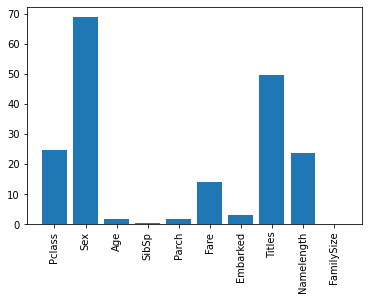

In [5427]:
#Feature importance analysis
train['Namelength']=train['Name'].apply(lambda x:len(x))

predictors0=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Titles', 'Namelength','FamilySize']
selector=SelectKBest(f_classif,k=5)
selector.fit(train[predictors0],train['Survived'])
 
scores=-np.log10(selector.pvalues_)
 
plt.bar(range(len(predictors0)),scores)
plt.xticks(range(len(predictors0)),predictors0,rotation='vertical')
plt.show()

In [5428]:
#Processing test sets
#View test set numerical data statistics results
test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.377990,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.485466,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5429]:
#Check the missing data of the test set before processing
#There are three default properties 1 Age 2. Fare 3. Cabin
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5430]:
#Process Name data
test['Title'] = test['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
#Royalty
train['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady'], 'Royalty', inplace=True)
#Master
test['Title'].replace(['Master'], 'Master', inplace=True)
#MMrs
test['Title'].replace(['Mme', 'Mrs'],'Mrs', inplace=True)
#Miss
test['Title'].replace(['Mlle', 'Miss', 'Ms'], 'Miss', inplace=True)
#Mr
test['Title'].replace(['Mr'], 'Mr', inplace=True)
#其他
test['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer'], 'Other', inplace=True)

In [5431]:
#Complete Fare
#View Fare data
test[test['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [5432]:
#Query the median of fare data according to pclass and embarkedc
test.groupby(by=["Pclass","Embarked"]).Fare.median()

Pclass  Embarked
1       C           75.24585
        Q           90.00000
        S           51.67085
2       C           15.04580
        Q           11.52915
        S           21.00000
3       C            7.22920
        Q            7.75000
        S            8.05000
Name: Fare, dtype: float64

In [5433]:
#Complete Fare data
test['Fare'] = test['Fare'].fillna(8.05000)

#View the default data after Fare completion
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
 12  Title        418 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 42.6+ KB


In [5434]:
#Age completion
ages = test[['Age', 'Pclass','Sex','Title','Fare']]#Need to complete fare first
ages=pd.get_dummies(ages)

known_ages = ages[ages.Age.notnull()].values
unknown_ages = ages[ages.Age.isnull()].values
y = known_ages[:, 0]
X = known_ages[:, 1:]

rfr = RandomForestRegressor(random_state=60, n_estimators=100, n_jobs=-1)

rfr.fit(X, y)


pre_ages = rfr.predict(unknown_ages[:, 1::])

test.loc[ (test.Age.isnull()), 'Age' ] = pre_ages

#View data default after Age completion
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
 12  Title        418 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 42.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
 12  Title        418 non-null    object 
 13  BoardNumber  418 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 45.8+ KB


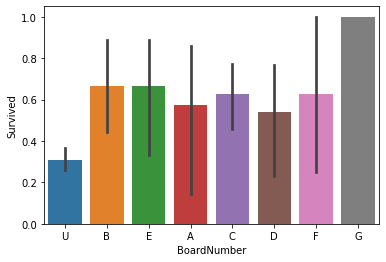

In [5435]:
#Cabin completion
test['Cabin'] = test['Cabin'].fillna('Unkown')
test['BoardNumber']=test['Cabin'].str.get(0)
sns.barplot(x="BoardNumber", y="Survived", data=test)

#View data default after Cabin completion
test.info()

In [5436]:
#Test set exception data processing
#1. Divide passengers with the same surname into a group of families
test['Surname']=test['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(test['Surname'].value_counts())
test['FamilyByGroup'] = test['Surname'].apply(lambda x:Surname_Count[x])
#Group 1: children and women younger than 12
Female_Child_Group=test.loc[(test['FamilyByGroup']>=2) & ((test['Age']<=12) | (test['Sex']=='female'))]
#Group 2: men older than 12
Male_Adult_Group=test.loc[(test['FamilyByGroup']>=2) & (test['Age']>12) & (test['Sex']=='male')]

Text(0.5, 0, 'GroupOneAverageSurvived')

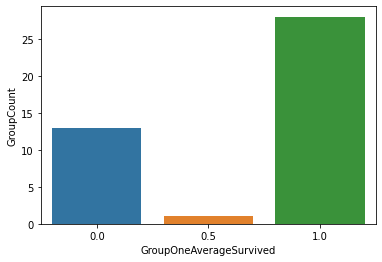

In [5437]:
#2.1. Data visualization showed that the approximate survival probability of children and women in the same group was 0 or 1 at the same time
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel('GroupOneAverageSurvived')

Text(0.5, 0, 'GroupTwoAverageSurvived')

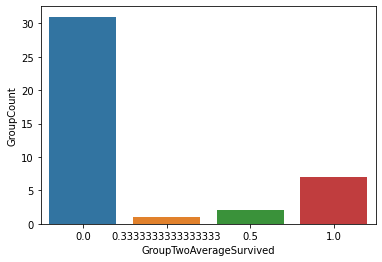

In [5438]:
#2.2. Data visualization showed that the probability of survival of adult males in the same group was also 0 or 1
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
#Male_Adult
sns.barplot(x=Male_Adult.index, y=Male_Adult["GroupCount"]).set_xlabel('GroupTwoAverageSurvived')

In [5439]:
#Select the abnormal group in the test set for treatment
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
#The group with female and child survival rate of 0 was set as abnormal group 1
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
#The group with adult male survival rate of 1 was set as abnormal group 2
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Khalil', 'van Billiard', 'Asplund', 'Mahon', 'Sage', 'Cacic', 'Goodwin', 'Andersson', 'Peacock', 'Straus', 'Johnston', 'Klasen', 'Buckley'}
{'Abelseth', 'Spedden', 'Stengel', 'Kink-Heilmann', 'Dodge', 'Snyder', 'Buckley'}


In [5440]:
#Punish and modify the data that meets the abnormal group
test=test.loc[test['Survived']]

#Treatment group 1
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

#Treatment group 2
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'

In [5441]:
#Mapping Name data to numeric data
#re make the python language have all the regular expression functions
import re     
def get_title(name):
    #re.search Scans the entire string and returns the first successful match
    title_search=re.search(' ([A-Za-z]+)\.',name) 
    if title_search:
        #View matches
        return title_search.group(1) 
    return ""
 
titles=test['Name'].apply(get_title)
print(pd.value_counts(titles))

Mr     260
Mrs    158
Name: Name, dtype: int64


In [5442]:
#Mapping Name data to numeric data
title_mapping={'Don':1, 'Sir':1, 'Countess':1, 'Lady':1, 
               'Master':2,
               'Mme':3, 'Mrs':3,
               'Mlle':4, 'Miss':4, 'Ms':4,
               'Mr':5,
               'Capt':8, 'Col':7, 'Major':7,  'Dr':5,  'Rev':6,  'Jonkheer':8}
for k,v in title_mapping.items():
    titles[titles==k]=v
 
print(pd.value_counts(titles))
test['Titles']=titles

5    260
3    158
Name: Name, dtype: int64


In [5443]:
#Data conversion
#Mapping Sex data to numeric data
test.loc[test['Sex']=='male','Sex']=0
test.loc[test['Sex']=='female','Sex']=1
test['Sex'].describe()

count     418
unique      2
top         0
freq      260
Name: Sex, dtype: int64

In [5444]:
#Data conversion
#Mapping Embarked data to numeric data
test.loc[test['Embarked']=='S','Embarked']=0
test.loc[test['Embarked']=='C','Embarked']=1
test.loc[test['Embarked']=='Q','Embarked']=2
test['Embarked'].describe()

count     418
unique      2
top         2
freq      260
Name: Embarked, dtype: int64

In [5445]:
#Algorithm 2--logistic regression
#Select features that have a greater impact on survival probability
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
#Initialize model object and 
alg=LogisticRegression(random_state=1)
#Initialize model object
scores = model_selection.cross_val_score(alg, train[predictors], train['Survived'], cv=3)
#Take the average of 3 samples
print(scores.mean()) 

0.8024691358024691


d:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [5446]:
#Algorithm 3--Random forest algorithm
#Select features that have a greater impact on survival probability
#predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
#Replace the predicted value according to the feature importance
predictors=['Pclass','Age','Sex','Fare','Titles']
#X is a matrix of features
X = train[predictors]
#y is a column in the data to be predicted
y = train["Survived"]
#Standardization x matrix
X = preprocessing.scale(X)
#The data were divided into 3 copies for cross validation
kf=model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
#Setting parameters: number of decision trees, minimum node and minimum leaf node
rf_alg=RandomForestClassifier(n_estimators=80, min_samples_split=6, min_samples_leaf=2)
#The data set and parameters are put into the classifier- 
#-for cross validation to obtain the prediction results
rf_alg_scores = model_selection.cross_val_score(rf_alg, X, y, cv=kf)
#The results of printing 3 copies of data are averaged
print(rf_alg_scores)
print(rf_alg_scores.mean())

[0.81144781 0.85521886 0.86195286]
0.8428731762065095


In [5447]:
#Generate a new dataset
#datas=train+test
datas = pd.concat([train, test], ignore_index = True)

import re     
def get_title(name):
    title_search=re.search(' ([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ""
 
titles=datas['Name'].apply(get_title)


title_mapping={'Don':1, 'Sir':1, 'Countess':1, 'Lady':1, 
               'Master':2,
               'Mme':3, 'Mrs':3,
               'Mlle':4, 'Miss':4, 'Ms':4,
               'Mr':5,
               'Capt':8, 'Col':7, 'Major':7,  'Dr':5,  'Rev':6,  'Jonkheer':8}
for k,v in title_mapping.items():
    titles[titles==k]=v
 

datas['Titles']=titles

datas.loc[datas['Sex']=='male','Sex']=0
datas.loc[datas['Sex']=='female','Sex']=1

datas.loc[datas['Embarked']=='S','Embarked']=0
datas.loc[datas['Embarked']=='C','Embarked']=1
datas.loc[datas['Embarked']=='Q','Embarked']=2

In [5457]:
#Algorithm 1--linear regression
#Select features that have a greater impact on survival probability
predictors=['Pclass','Age','Sex','Fare','Titles']
#Initialize model object
alg=LinearRegression()
#The data were divided into 3 copies for cross validation
##KF is the split data
kf = KFold(n_splits=3, shuffle=True, random_state=1)

predictions=[]
##train and test are the divided index
for train, test in kf.split(datas):
    #Index the data by line number, and only the selected feature data is taken
    train_predictors=(datas[predictors].iloc[train,:])
    train_target=datas["Survived"].iloc[train]
    #training
    alg.fit(train_predictors,train_target)
    #testing
    test_predictions=alg.predict(datas[predictors].iloc[test,:])
    #Save the predicted survival probability of each individual in 3 cross validation
    predictions.append(test_predictions)
predictions=np.concatenate(predictions,axis=0) 
#If the probability is greater than 0.5, the individual survives
predictions[predictions>0.5]=1
#If the probability is less than 0.5, the individual does not survive
predictions[predictions<=0.5]=0
#Compare with the actual results to calculate the accuracy
#Number of predicted and actual situations / number of all samples
accuracy=len(predictions[predictions==datas["Survived"]])/(len(predictions))
print(accuracy )

0.5347593582887701


In [5449]:
#Algorithm4 Algorithm integration
algorithms = [
    #[GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3),['Pclass','Age','Sex','Fare','Titles']],
    [RandomForestClassifier(n_estimators=80, min_samples_split=6, min_samples_leaf=2),['Pclass','Age','Sex','Fare','Titles']],
    [LogisticRegression(random_state=1), ['Pclass','Age','Sex','Fare','Titles']]]
#The data were divided into 3 copies for cross validation KF is the split data
kf=model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
 
predictions = []
#train and test are the divided index
for train, test in kf.split(datas):
    #Index the data by line number, and only the selected feature data is taken
    train_predictors=(datas[predictors].iloc[train,:])
    train_target = datas["Survived"].iloc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(train_predictors,train_target)
        test_predictions = alg.predict_proba(datas[predictors].iloc[test, :].astype(float))[:, 1]
        full_test_predictions.append(test_predictions)
    ##The result is the sum of the results of the two algorithms divided by 2
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    #If the probability is greater than 0.5, the individual survives
    test_predictions[test_predictions <= .5] = 0
    #If the probability is less than 0.5, the individual does not survive
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)
predictions = np.concatenate(predictions, axis=0)
#Compare with the actual results to calculate the accuracy
#accuracy = sum(predictions[predictions == datas["Survived"]]) / len(predictions)
accuracy = sum(predictions[predictions == datas["Survived"]]) / len(datas["Survived"].iloc[test])
print(accuracy * 2)

0.8165137614678899
